# 1 notes_day1

## 1 a brief intro to Python

In [2]:
import datetime

datetime_object = datetime.datetime.now()
date = datetime_object.date()

print(f"Today's date is {date}.")

Today's date is 2019-12-16.


In [3]:
print(f"The next year is {date.year + 1}")

The next year is 2020


## 2 need for speed

`%%time`: it gives us how long it takes.
ipython cellmagic

`%%timeit`: it gives us more specific details

In [6]:
import numpy as np

def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

grid = np.linspace(-3, 3, 1000)

In [11]:
m = -np.inf

for x in grid:
    for y in grid:
        z = f(x, y)
        if z > m:
            m = z
print(m)

0.9999819641085747


In [12]:
x, y = np.meshgrid(grid, grid)
np.max(f(x,y))

0.9999819641085747

### Exercises

## 2 Numpy

### Exercise 1

Consider the polynomial expression


<a id='equation-np-polynom'></a>
$$
p(x) = a_0 + a_1 x + a_2 x^2 + \cdots a_N x^N = \sum_{n=0}^N a_n x^n \tag{1}
$$

[Earlier](python_essentials.ipynb#pyess-ex2), you wrote a simple function `p(x, coeff)` to evaluate [(1)](#equation-np-polynom) without considering efficiency.

Now write a new function that does the same job, but uses NumPy arrays and array operations for its computations, rather than any form of Python loop.

(Such functionality is already implemented as `np.poly1d`, but for the sake of the exercise don’t use this class)

- Hint: Use `np.cumprod()`  



<a id='np-ex2'></a>

In [85]:
import numpy as np

def p(x, coeff):
    A = coeff
    X = np.empty(len(A)-1)
    X[:] = x
    X = np.cumprod(X)
    Z = 1
    X = np.append(Z, X)
    return A @ X

In [86]:
x = 2
coeff = [1, 1, 1, 1]

In [87]:
p(x, coeff)

15.0

### Exercise 2

Let `q` be a NumPy array of length `n` with `q.sum() == 1`.

Suppose that `q` represents a [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function).

We wish to generate a discrete random variable $ x $ such that $ \mathbb P\{x = i\} = q_i $.

In other words, `x` takes values in `range(len(q))` and `x = i` with probability `q[i]`.

The standard (inverse transform) algorithm is as follows:

- Divide the unit interval $ [0, 1] $ into $ n $ subintervals $ I_0, I_1, \ldots, I_{n-1} $ such that the length of $ I_i $ is $ q_i $.  
- Draw a uniform random variable $ U $ on $ [0, 1] $ and return the $ i $ such that $ U \in I_i $.  


The probability of drawing $ i $ is the length of $ I_i $, which is equal to $ q_i $.

We can implement the algorithm as follows

In [17]:
from random import uniform

def sample(q):
    a = 0.0 # left endpoint of [0,1]
    U = uniform(0, 1)
    for i in range(len(q)):
        if a < U <= a + q[i]:
            return i
        a = a + q[i]
np.searchsorted()
np.cumsum()

If you can’t see how this works, try thinking through the flow for a simple example, such as `q = [0.25, 0.75]`
It helps to sketch the intervals on paper.

Your exercise is to speed it up using NumPy, avoiding explicit loops

- Hint: Use `np.searchsorted` and `np.cumsum`  


If you can, implement the functionality as a class called `discreteRV`, where

- the data for an instance of the class is the vector of probabilities `q`  
- the class has a `draw()` method, which returns one draw according to the algorithm described above  


If you can, write the method so that `draw(k)` returns `k` draws from `q`.


<a id='np-ex3'></a>

In [112]:
q = [0.25, 0.75]

np.cumsum(q)

array([0.25, 1.  ])

In [127]:
def draw(q):
    U = uniform(0,1)
    Q = np.cumsum(q)
    return np.searchsorted(Q, U)
    

In [129]:
draw(q)

1

## 3 Scipy

### Exercise 1



Consider a firm with profit function 

$$ \pi(p, q) = pq -\exp(q) - 0.5 q^2 $$

Plot profit maximizing $\pi$ with respect to $q$ as a function of price for $p \in [5, 10]$.


Note: for this exercise, the solution is embedded in the notebook rather than the website.  See below.

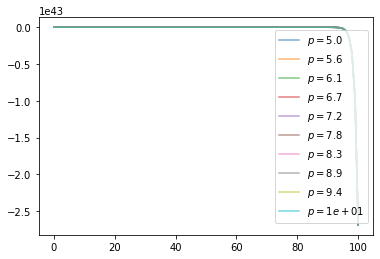

In [96]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
%matplotlib inline


def π(p, q):
    return p * q - np.exp(q) - 0.5 * (q**2)

fig, ax= plt.subplots()
p = np.linspace(5, 10, 10)
q = np.linspace(0, 100, 100)

for i in p:
    y = π(i, q)
    current_label = f'$p = {i:0.2}$'
    ax.plot(q, y,alpha=0.6, label=current_label)
ax.legend(loc='right')
plt.show()


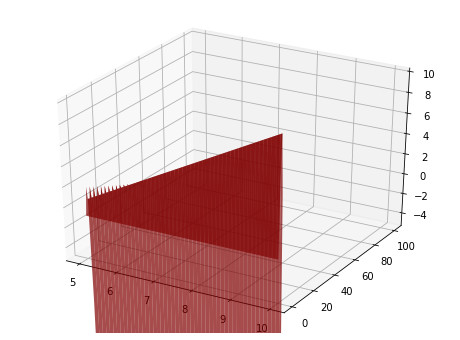

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

def π(p, q):
    return p * q - np.exp(q) - 0.5 * (q**2)

pgrid = np.linspace(5, 10, 100)
qgrid = np.linspace(0, 100, 100)
p, q = np.meshgrid(pgrid, qgrid)

fig= plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(p,
                q,
                π(p, q),
                rstride=2, cstride=2,
               cmap=cm.jet,
               alpha = 0.7,
               linewidth=0.25)
ax.set_zlim(-5,10)
ax.legend
plt.show()


## 4 Matplotlib


### Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![matplotlib_ex1.png](figures/matplotlib_ex1.png)  

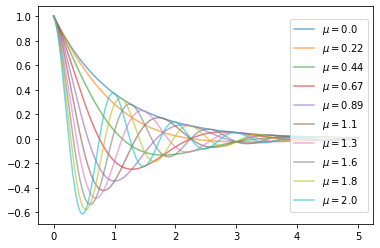

In [89]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
%matplotlib inline


def f(x, θ):
    return np.cos(ma.pi * θ * x)*np.exp(-x)

fig, ax= plt.subplots()
x = np.linspace(0,5, 1000)
θ = np.linspace(0, 2, 10)
for i in θ:
    y = f(x, i)
    current_label = f'$\mu = {i:0.2}$'
    ax.plot(x, y,alpha=0.6, label=current_label)
ax.legend(loc='right')
plt.show()
    

### Exercise 2

Here's an implementation of the [empirical cumulative distribution function](https://en.wikipedia.org/wiki/Empirical_distribution_function).

The ``__call__`` method allows the user to evaluation the class as if it was a function.

For each ``x``, this method gives the fraction of the sample ``observations`` that is ``<= x``.

In [183]:
class ECDF:

    def __init__(self, observations):
        self.observations = observations

    def __call__(self, x):
        counter = 0.0
        for obs in self.observations:
            if obs <= x:
                counter += 1
        self.y = counter / len(self.observations)
        return self.y
    def __plot__(self, a, b):
        

Here's an example of how it works:

In [184]:
F = ECDF(np.random.uniform(0, 1, size=1_000_000))
F(0.5)  # Should be close to 0.5

0.500761

Your task is to

1. Make the `__call__` method more efficient using NumPy.  
1. Add a method that plots the ECDF over $ [a, b] $, where $ a $ and $ b $ are method parameters.  

In [189]:
class ECDF:

    def __init__(self, observations):
        self.observations = observations

    def __call__(self, x):
        counter = 0.0
        for obs in self.observations:
            if obs <= x:
                counter += 1
        self.y = counter / len(self.observations)
        return self.y
    def __plot__(self, x, a, b):
        fig, ax= plt.subplots()
        z = np.linspace(a,b, 100)
        plt.plot(z, self.y, alpha=0.6)
        plt.legend()
        plt.show()

In [190]:
F = ECDF(np.random.uniform(0, 1, size=1_000_000))
F(0.5, 1)

TypeError: __call__() takes 2 positional arguments but 3 were given

## 5 numba and JIT compilation




### Exercise 1

[An exercise](https://python.quantecon.org/python_by_example.html#Exercise-3) in one of the QuantEcon lectures considers how to approximate $ \pi $ by
Monte Carlo.

Use the same idea here, but make the code efficient using Numba.

Compare speed with and without Numba when the sample size is large.


<a id='speed-ex2'></a>

In [75]:
import numpy as np
from numba import jit

def π(n):
    i = 0
    s_c = 0
    while i <= n:
        u = [np.random.uniform(0,1) for i in range(2)]
        x, y = u
        a = x**2 + y**2
        if a <= 1:
            s_c += 1
        else:
            s_c += 0
            i += 1
    r = 1
    s = s_c /n
    return (s * 4) / (r**2)
q = 1000000
π_numba = jit(π)

In [78]:
%%time
π(q)

CPU times: user 19.9 s, sys: 9.75 ms, total: 19.9 s
Wall time: 19.9 s


14.652224

In [79]:
%%time
π_numba(q)

CPU times: user 1.69 s, sys: 3.49 ms, total: 1.69 s
Wall time: 1.69 s


14.645956

### Exercise 2

Later we’ll learn about finite-state Markov chains.

For now, let’s just concentrate on simulating a very simple example of such a chain.

Suppose that the volatility of returns on an asset can be in one of two regimes — high or low.

The transition probabilities across states are as follows

![nfs_ex1.png](figures/nfs_ex1.png)  

For example, let the period length be one day, and suppose the current state is high.

We see from the graph that the state tomorrow will be

- high with probability 0.8  
- low with probability 0.2  


Your task is to simulate a sequence of daily volatility states according to this rule.

Set the length of the sequence to `n = 1_000_000` and start in the high state.

Implement a pure Python version and a Numba version, and compare speeds.

To test your code, evaluate the fraction of time that the chain spends in the low state.

If your code is correct, it should be about 2/3.

Hints:

- Represent the low state as 0 and the high state as 1.  
- If you want to store integers in a NumPy array and then apply JIT compilation, use `x = np.empty(n, dtype=np.int_)`.  

In [179]:
import numpy as np
import numba as nb
from numba import jit

def vol(n,length_min):
    v = np.array([1,0])
    new_v = np.copy(v)
    Q = np.array([[0.8, 0.2], [0.9, 0.1]])
    i = 0
    z = 100
    x = np.empty(n, dtype=np.int_)
    while i <= n:
        x[i] = new_v[0]
        new_v = v @ Q
        z = np.abs(len(new_v - v))
        i += 1
    return x
    

In [180]:
n, q = [1000000, 10e-7]
vol_numba=jit(vol)

In [182]:

vol(n, q)

IndexError: index 1000000 is out of bounds for axis 0 with size 1000000

In [181]:
vol_numba(n, q)

<ipython-input-179-acc2a7c63f7c>:5: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "vol" failed type inference due to: Invalid use of Function(<built-in function matmul>) with argument(s) of type(s): (array(int64, 1d, C), array(float64, 2d, C))
 * parameterized
In definition 0:
    TypingError: '@' arguments must all have the same dtype
    raised from /Users/shuhu/anaconda3/lib/python3.7/site-packages/numba/typing/npydecl.py:980
In definition 1:
    TypingError: '@' arguments must all have the same dtype
    raised from /Users/shuhu/anaconda3/lib/python3.7/site-packages/numba/typing/npydecl.py:980
This error is usually caused by passing an argument of a type that is unsupported by the named function.
[1] During: typing of intrinsic-call at <ipython-input-179-acc2a7c63f7c> (14)

File "<ipython-input-179-acc2a7c63f7c>", line 14:
def vol(n,length_min):
    <source elided>
        x[i] = new_v[0]
        new_v = v @ Q
        ^

  def v

IndexError: index 1000000 is out of bounds for axis 0 with size 1000000